In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cabm.agent_functions import (
    sample_normal_min,
    sample_beta_min,
    get_ad_impact_on_purchase_probabilities,
    get_price_impact_on_brand_choice_probabilities,
)

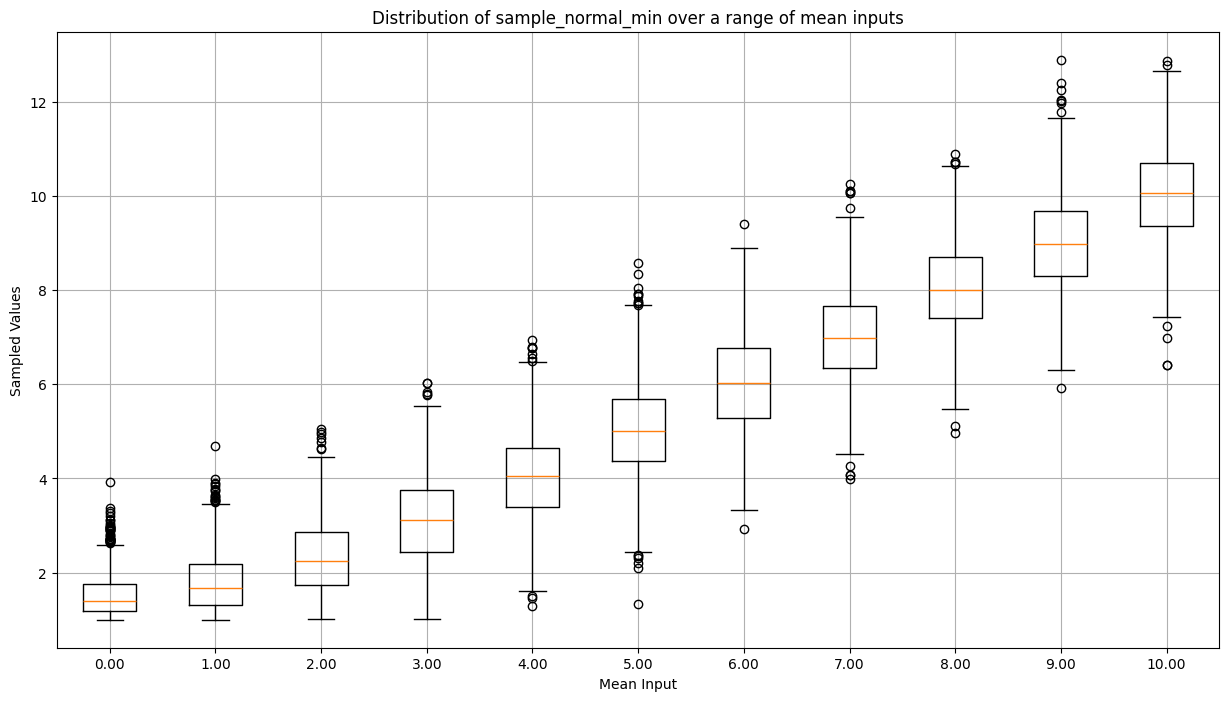

In [2]:
def visualize_sample_normal_min(mean_range, std_dev=1.0, min_value=1.0, override=0, num_samples=1000):
    all_samples = []

    for mean in mean_range:
        mean_samples = [sample_normal_min(mean, std_dev, min_value, override) for _ in range(num_samples)]
        all_samples.append(mean_samples)

    plt.figure(figsize=(15, 8))
    plt.boxplot(all_samples, positions=mean_range, widths=0.5)
    plt.xlabel('Mean Input')
    plt.ylabel('Sampled Values')
    plt.title('Distribution of sample_normal_min over a range of mean inputs')
    plt.grid(True)
    
    # Format x-axis tick labels to show fewer decimal places
    plt.xticks(ticks=mean_range, labels=[f'{mean:.2f}' for mean in mean_range])
    
    plt.show()

# Define the range of mean values
mean_range = [i for i in range(0,11)]

# Visualize the function
visualize_sample_normal_min(mean_range)

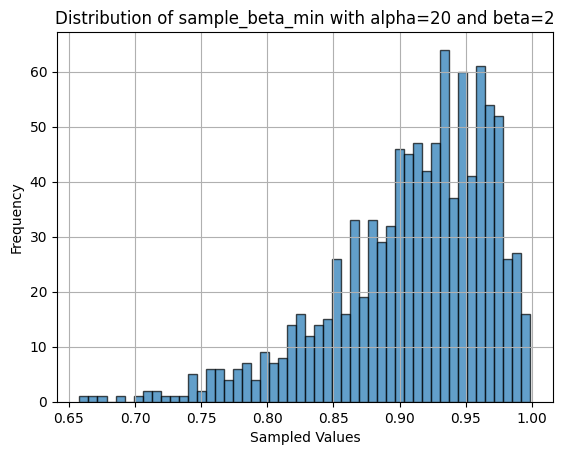

In [3]:
alpha = 20
beta = 2
samps = [sample_beta_min(alpha=alpha,beta=beta) for i in range(1000)]
plt.hist(samps, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Sampled Values')
plt.ylabel('Frequency')
plt.title(f'Distribution of sample_beta_min with alpha={alpha} and beta={beta}')
plt.grid(True)
    
plt.show()

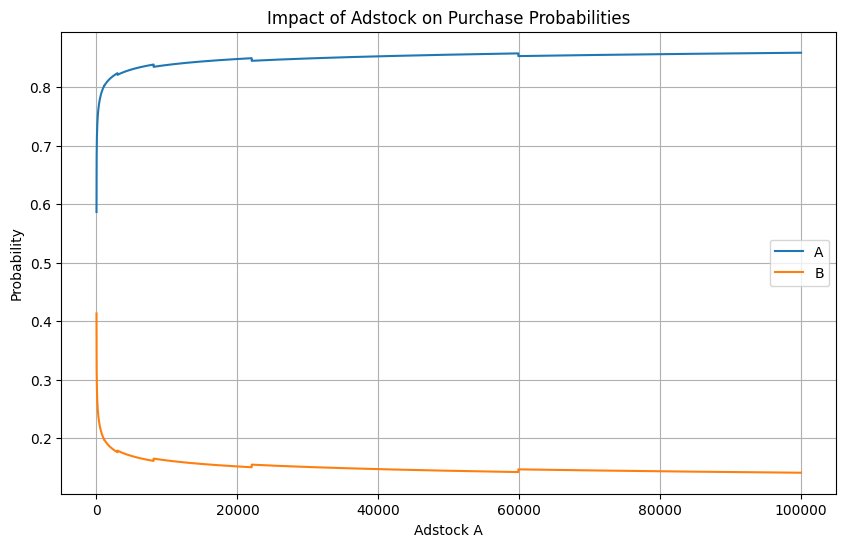

In [4]:
# Define the range for "A" adstock
adstock_A_range = range(1, 100001)

# Initialize lists to store the results
prob_A = []
prob_B = []

# Iterate over the adstock_A_range
for adstock_A in adstock_A_range:
    adstock = {"A": adstock_A, "B": 1000}
    brand_preference = "A"
    loyalty_rate = 0.8

    # Get the probabilities
    probabilities = get_ad_impact_on_purchase_probabilities(adstock=adstock, brand_preference=brand_preference, loyalty_rate=loyalty_rate)
    
    # Store the probabilities
    prob_A.append(probabilities['A'])
    prob_B.append(probabilities['B'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(adstock_A_range, prob_A, label='A')
plt.plot(adstock_A_range, prob_B, label='B')
plt.xlabel('Adstock A')
plt.ylabel('Probability')
plt.title('Impact of Adstock on Purchase Probabilities')
plt.legend()
plt.grid(True)
plt.show()

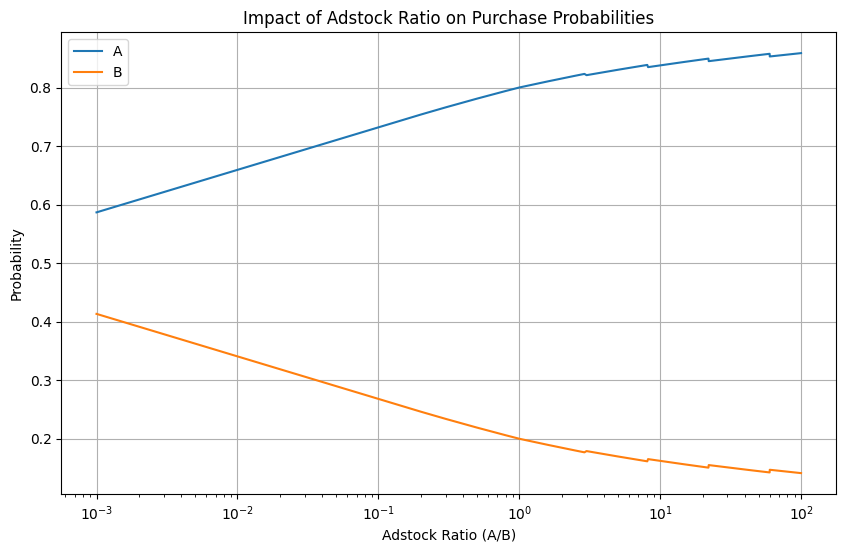

In [15]:
# Define the range for "A" adstock
adstock_A_range = range(1, 100001, 100)

# Initialize lists to store the results
prob_A = []
prob_B = []
adstock_ratios = []  # List to store the adstock ratios

# Iterate over the adstock_A_range
for adstock_A in adstock_A_range:
    adstock_B = 1000
    adstock = {"A": adstock_A, "B": adstock_B}
    brand_preference = "A"
    loyalty_rate = 0.8

    # Get the probabilities
    probabilities = get_ad_impact_on_purchase_probabilities(adstock=adstock, brand_preference=brand_preference, loyalty_rate=loyalty_rate)
    
    # Store the probabilities
    prob_A.append(probabilities['A'])
    prob_B.append(probabilities['B'])

    # Calculate and store the adstock ratio
    adstock_ratios.append(adstock_A / adstock_B)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(adstock_ratios, prob_A, label='A')  # Use adstock_ratios as x-axis values
plt.plot(adstock_ratios, prob_B, label='B')  # Use adstock_ratios as x-axis values
plt.xlabel('Adstock Ratio (A/B)')
plt.xscale('log')
plt.ylabel('Probability')
plt.title('Impact of Adstock Ratio on Purchase Probabilities')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
prob_A

[0.5867048173826052,
 0.7321707367154457,
 0.7539045897889852,
 0.766127599900326,
 0.7745604949735672,
 0.7809598313191848,
 0.7860948564692445,
 0.7903700574872085,
 0.7940238858752791,
 0.7972084609199167,
 0.8000266253994515,
 0.802188144413072,
 0.8041497874253966,
 0.8059415463992294,
 0.8075895309860629,
 0.8091143213957849,
 0.8105324197842773,
 0.8118572559055375,
 0.8130999015554295,
 0.8142695893049146,
 0.8153740964127851,
 0.8164200338185941,
 0.8174130670020916,
 0.8183580870826941,
 0.8192593450073611,
 0.8201205579691987,
 0.8209449946653695,
 0.8217355442404182,
 0.822494772515634,
 0.8232249682121208,
 0.8210649410231992,
 0.821665929190633,
 0.8222463401067603,
 0.8228074862997187,
 0.8233505600294895,
 0.8238766474661887,
 0.8243867408453494,
 0.8248817489362775,
 0.8253625060962704,
 0.8258297801334401,
 0.8262842791610584,
 0.8267266575944398,
 0.8271575214156704,
 0.8275774328106731,
 0.827986914266121,
 0.8283864521998272,
 0.8287765001868044,
 0.829157481833738